# TCC-CBB 

Objetivo: Testar aplicação dos algoritmos PCA, SVM e XGBoost em Python

Data: 31/01/2019

Desenvolvido por: Thyago e Ricardo

Este script tem por objetivo visualizar resultados da aplicação dos algoritmos SVM e XGBoost na base de dados BigML. O primeiro passo consiste em instalar as bibliotecas necessárias.

In [1]:
!pip install bigml

  Created wheel for bigml: filename=bigml-4.28.1-cp37-none-any.whl size=430526 sha256=c398eb876d8658ba37318a52b010dcb169feb37896dafade6cf2e00d48f98e6e
  Stored in directory: C:\Users\THERMALTAKE\AppData\Local\pip\Cache\wheels\c5\ae\4e\a70167c6e7b2adbd81033872bf102f335671b3fe0cf912ab25
  Created wheel for bigml-chronos: filename=bigml_chronos-0.4.1-cp37-none-any.whl size=14559 sha256=67cdfdd960d45ed8822f3a86226e2ac42c1171ab093a6e4ad3e678569015fb24
  Stored in directory: C:\Users\THERMALTAKE\AppData\Local\pip\Cache\wheels\83\55\89\6f6cb182dd0a662b3e652c5cf55049a963c162bb6c810ff9ed
Successfully built bigml bigml-chronos


In [2]:
!pip install xgboost

Importando as bibliotecas BigML (API para download do dataset), OS (para verificar o caminho que se está executando o python) e Pandas (para criação dos dataframes, estrutura de dados utilizada nos algoritmos)

In [1]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import bigml.api

In [3]:
import os

In [4]:
import pandas as pd

In [5]:
from bigml.api import BigML

# Leitura da base de dados
Utilização das credenciais para leitura do dataset por meio da API:

In [6]:
api = BigML('ricardomorellosantos','b34ec3c18161b1da38b0c5e04520224f7544405e')

Leitura do dataset e gravando-o no diretório atual em um arquivo CSV

In [7]:
api.download_dataset(dataset='dataset/5e356cd41efc9271bf006ea2', filename=os.getcwd()+'\\bigml.csv')

'C:\\Users\\Ricardo\\Downloads\\bigml.csv'

Leitura do dataset em uma estrutura de dados DataFrame do pandas. Um dataframe é uma estrutura que permite armazenar dados heterogêneos de maneira tabular.

In [8]:
df_bigml = pd.read_csv(os.getcwd()+'\\bigml.csv')

Apresentando informações sobre a base de dados já armazenada em um dataframe.

Primeiros 5 registros:

In [9]:
df_bigml.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Informações sobre colunas e número de registros:

In [10]:
df_bigml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


# Preparação dos dados para utilização do algoritmo PCA
Dados do tipo string serão convertidos para números para aplicação do PCA.
Colunas que possuem valores binários (Yes e No ou True e False) serão alteradas para Yes = 0, True = 0, No = 1 e False = 1, transformando estes valores em números.

Função para, dada uma palavra (Yes ou No, True ou False), retornar um valor booleano:

In [11]:
def converte_binario(palavra):
    if palavra=='Yes' or palavra==True:
        return 0
    elif palavra=='No' or palavra==False:
        return 1

Aplicando essa função nas colunas Voice Mail Plan e International Plan (que contém valores Yes e No) e Churn (que contém True ou False). A coluna Churn é o target do dataframe. A coluna target é aquela que contém a resposta da classificação. Neste caso, se o usuário deixou ou manteve o plano com a operadora de telefonia.

In [12]:
df_bigml['Voice mail plan'] = df_bigml['Voice mail plan'].apply(converte_binario)

In [13]:
df_bigml['International plan'] = df_bigml['International plan'].apply(converte_binario)

In [14]:
df_bigml['Churn'] = df_bigml['Churn'].apply(converte_binario)

Apreentando as primeiras 5 linhas do novo dataframe, para verificar se a transformação foi feita da maneira correta:

In [15]:
df_bigml.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1
1,OH,107,415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
2,NJ,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,OH,84,408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,OK,75,415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


A coluna Churn é o target desta classificação. Portanto, ela será armazenada em um dataframe a parte, para que ela não interfira no algoritmo PCA e para realizar a separação do dataset.

In [16]:
df_bigml_target = df_bigml['Churn']

Excluindo a coluna Churn do dataframe original:

In [17]:
df_bigml.drop('Churn', axis=1, inplace=True)

Visualizando os 5 primeiros registros do novo dataframe que contém apenas o resultado da classificação, df_bigml_target:

In [18]:
df_bigml_target.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

O dataframe antigo contém agora apenas as colunas não-target, visto que a coluna Churn foi excluída e copiada para outro dataframe:

In [19]:
df_bigml.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Estas linhas apenas foram executadas para verificar a proporção de Yes e No nas colunas após a transformação destes valores para 0 e 1. Nota-se que os valores 1 (No) e 0 (Yes) contém os mesmos números de registros de antes da transformação. Portanto, a função foi aplicada corretamente.

In [20]:
df_bigml['Voice mail plan'].value_counts()

1    2411
0     922
Name: Voice mail plan, dtype: int64

In [21]:
states = df_bigml['State'].value_counts()

Agora, os dados de estados serão transformados em números para aplicação do PCA. Cada estado será armazenado em um vetor, e seu correspondente na coluna do dataframe assumirá o valor do índice deste vetor. Por exemplo, no vetor de estados v = ['KS', 'CA', 'WV', 'OH'], o estado da Califórnia assume o índice 1. Desta maneira, na coluna do dataframe, seu novo valor será substituído de Ca para 1.

In [22]:
array_estados = []
i = 0
for index, val in states.iteritems():
    array_estados.append(index)    

In [23]:
i = 0
for estado in array_estados:
    df_bigml['State'] = df_bigml['State'].replace(to_replace=estado, value=i)
    i = i+1

# Normalização dos dados para aplicação do PCA

Utilizamos um normalizador para manter os dados na mesma escala, evitando que diferenças em escalas nos dados interfiram negativamente no PCA. Importando a classe do normalizador:

In [24]:
from sklearn.preprocessing import StandardScaler

Instanciando a classe:

In [25]:
scaler = StandardScaler()

Ajustando o normalizador com o dataframe:

In [26]:
scaler.fit(df_bigml)

StandardScaler(copy=True, with_mean=True, with_std=True)

Transformando os dados do dataframe para o mesmo espaço numérico:

In [27]:
scaled_data = scaler.transform(df_bigml)

# Aplicação do PCA
Então, aplicou-se o PCA com 3 componentes. Importando a classe do PCA:

In [28]:
from sklearn.decomposition import PCA

Instanciando a classe:

In [29]:
pca = PCA(n_components = 3)

Ajustando o PCA com os dados. Nota-se que, agora, não estamos utilizando o dataframe original df_bigml, e sim o dataframe com os dados normalizados, denominado scaled_data.

In [30]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Matriz que conterá os dados após a aplicação do pca:

In [31]:
x_pca = pca.transform(scaled_data)

Visualizando as novas dimensões:

A matriz x_pca, que contém os dados após aplicação do PCA, possui apenas três colunas, referentes aos três componentes principais. Por outro lado, o dataframe scaled_data possui 19 dimensões, referentes às dimensões originais do dataset.

In [32]:
x_pca.shape

(3333, 3)

In [33]:
scaled_data.shape

(3333, 19)

Optamos por visualizar os dados do PCA num gráfico 3D interativo. Isto permite ver a distribuição espacial dos dados. 
Importando as bibliotecas para visualização 3D dos dados:

In [33]:
import plotly.express as px
import cufflinks as cf

Algumas configurações da biblioteca plotly:

In [34]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

Criando um dataframe com o vetor de saída dos dados do PCA. Este dataframe será utilizado apenas para visualização:

In [35]:
df_pca = pd.DataFrame(data=x_pca, columns = ['PC1','PC2','PC3'])

Configurando e apresentando o gráfico:

In [36]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color=df_bigml_target)
                    
fig.update_layout(
    title={
        'text': "Gráfico de dispersão PCA",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

# Divisão da base de dados em treino e teste

Para dividir a base de dados, optamos pelo fator 0.30. Importando a biblioteca para separação do dataframe:

In [34]:
from sklearn.model_selection import train_test_split

Dividindo o dataframe em treino e teste. X_train e X_test contém os dados dos componentes, enquanto y_train e y_test contém os resultados da classificação.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=0.30)

# Aplicação do SVM

Importando a biblioteca do SVM:

In [35]:
from sklearn.svm import SVC

Instanciando uma classe do SVM:

In [36]:
model = SVC(probability=True, gamma = 'auto')

Ajustando o SVM à divisão de treino: 

In [41]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Realizando a predição do SVM na divisão de teste:

In [42]:
predicoes_svm = model.predict(X_test)

# Avaliação do SVM

Utilizaremo as bibliotecas classification_report e confusion_matrix para apresentar as métricas da avaliação da classificação do SVM. Importando as bibliotecas:

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

Apresentação dos resultados da classificação do SVM:

In [44]:
print(classification_report(y_test, predicoes_svm))

             precision    recall  f1-score   support

          0       0.84      0.19      0.31       139
          1       0.88      0.99      0.94       861

avg / total       0.88      0.88      0.85      1000



In [45]:
print(confusion_matrix(y_test, predicoes_svm))

[[ 26 113]
 [  5 856]]


# Aplicação do XGBoost
Importando as bibliotecas do XGBoost. Esta biblioteca não é padrão do Python, e deve ser instalada.

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

Instanciando o classificador XGBoost:

In [44]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, probability = True)

Ajustando o classificador e realizando a predição:

In [45]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Avaliação do XGBoost
Apresentação dos resultados para o algoritmo XGBoost:

In [46]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.50      0.01      0.03       153
          1       0.85      1.00      0.92       847

avg / total       0.80      0.85      0.78      1000



In [47]:
print(confusion_matrix(y_test, preds))

[[  2 151]
 [  2 845]]


In [48]:
import seaborn as sns

# Média e desvio padrão do SVM

In [188]:
media_anterior = 0
auc_svm = []
medias_svm = []
convergencia = False
qtd_iguais = 0
pca = PCA(n_components = 16)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
while(not convergencia):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=0.20)
    model.fit(X_train,y_train)
    predictedprob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, predictedprob[:,1])
    roc_auc = auc(fpr, tpr)
    auc_svm.append(roc_auc)
    media_aucs = round(sum(auc_svm) / len(auc_svm), 2) 
    medias_svm.append(media_aucs)
    print(media_aucs)
    if media_anterior == media_aucs:
        qtd_iguais = qtd_iguais + 1
    else:
        qtd_iguais = 0
    if qtd_iguais == 10:
        convergencia = True
    media_anterior = media_aucs


0.93
0.92
0.91
0.91
0.91
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9


[0.8540762927769745, 0.8680454085646847, 0.8817393100599049, 0.8860792395380788, 0.8936415220293725, 0.8947649572649573, 0.8984903695991671, 0.9014274218941328, 0.908610064374313, 0.9095617663875156, 0.9117307490466361, 0.9151606805293004, 0.9166987370115104, 0.9193123166610969, 0.9294911519658473, 0.93292040618548]


<Figure size 864x432 with 0 Axes>

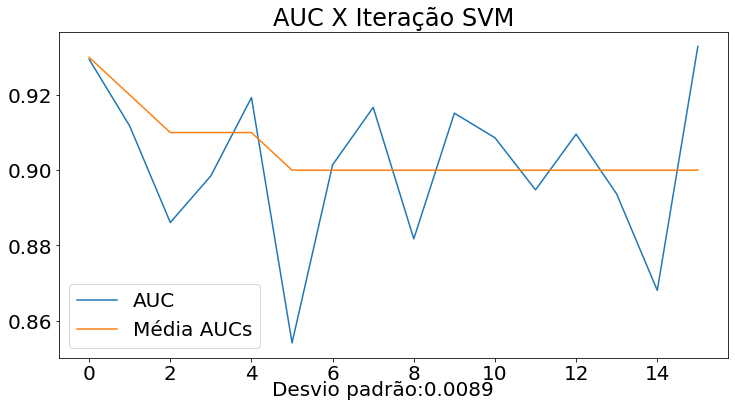

In [200]:
import statistics
fig = plt.figure(figsize=(12,6))
data_svm = pd.DataFrame({'AUC':auc_svm, 'Média AUCs':medias_svm})
ax = data_svm.plot(title = 'AUC X Iteração SVM', figsize = (12, 6))
ax.text(4.5, 0.84, 'Desvio padrão:{}'.format(round(statistics.stdev(medias_svm), 4)))
plt.savefig('auc_iteracao_svm_bigml.PNG')
print(sorted(auc_svm))

# Média e desvio padrão do XGBoost

In [214]:
media_anterior = 0
auc_xgboost = []
medias_xgboost = []
convergencia = False
qtd_iguais = 0
pca = PCA(n_components = 17)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
while(not convergencia):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=0.10)
    xg_reg.fit(X_train,y_train)
    predictedprob = xg_reg.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, predictedprob[:,1])
    roc_auc = auc(fpr, tpr)
    auc_xgboost.append(roc_auc)
    media_aucs = round(sum(auc_xgboost) / len(auc_xgboost), 2) 
    medias_xgboost.append(media_aucs)
    print(roc_auc)
    if media_anterior == media_aucs:
        qtd_iguais = qtd_iguais + 1
    else:
        qtd_iguais = 0
    if qtd_iguais >= 10:
        convergencia = True
    media_anterior = media_aucs


0.8102888537417797
0.8211309523809525
0.874910394265233
0.8494365859506113
0.7775510204081633
0.8184267709691438
0.7777812018489985
0.8393003273322422
0.7501730103806228
0.7861397581792319
0.7364130434782609
0.8127038486627528
0.8305244074397368
0.8836347259751957
0.8181009957325748
0.8763436874490325
0.8429929577464789
0.8354214545184966
0.8621830985915493
0.8625372410448277
0.8534735812133072
0.8250136388434262
0.8804511278195488
0.8162508153946509
0.8588906009244992
0.8580357142857142
0.8928894927536232
0.824771689497717
0.7773972602739727
0.7635125291375291
0.8334243334243334
0.8527826340326341
0.8820234708392602


[0.81, 0.82, 0.84, 0.84, 0.83, 0.83, 0.82, 0.82, 0.81, 0.81, 0.8, 0.8, 0.81, 0.81, 0.81, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]


<Figure size 864x432 with 0 Axes>

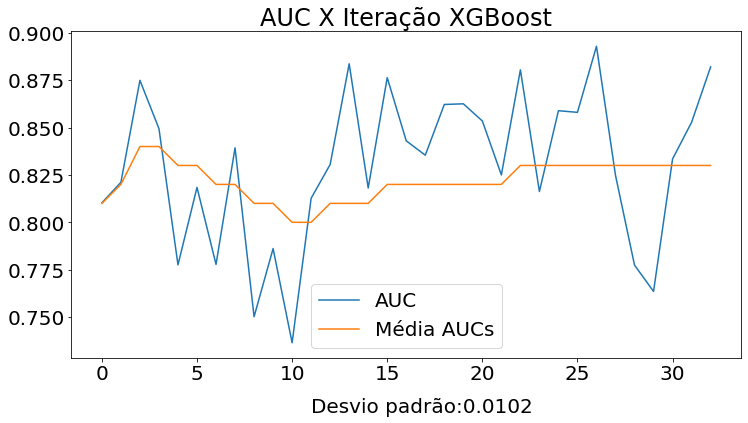

In [222]:
import statistics
fig = plt.figure(figsize=(12,6))
data_xgboost = pd.DataFrame({'AUC':auc_xgboost, 'Média AUCs':medias_xgboost})
ax = data_xgboost.plot(title = 'AUC X Iteração XGBoost', figsize = (12, 6))
ax.text(11, 0.7, 'Desvio padrão:{}'.format(round(statistics.stdev(medias_xgboost), 4)))
plt.savefig('auc_iteracao_xgboost_bigml.PNG')
print(medias_xgboost)

# Gráfico de média e desvio padrão xgboost e svm

44
23


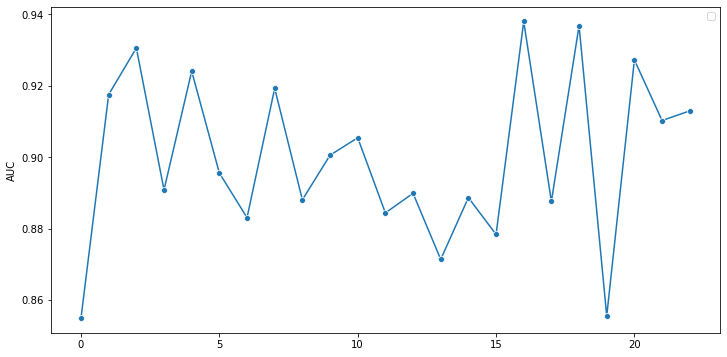

In [89]:
df_auc_med_desvpad = pd.DataFrame(auc_med_desvpad_xgboost)
print(len(auc_med_desvpad_xgboost))
print(len(auc_med_desvpad_svm))


fig = plt.figure(figsize = (12,6))
plt.ylabel('AUC')

g = sns.lineplot(data = df_auc_med_desvpad_svm, marker = 'o', )
g.legend('')

In [81]:
df_auc_med_desvpad['SVM'] = auc_med_desvpad_svm
df_auc_med_desvpad

ValueError: Length of values does not match length of index

# Curva ROC SVM

In [121]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=0.30)
model.fit(X_train,y_train)
predictedprobSVC = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

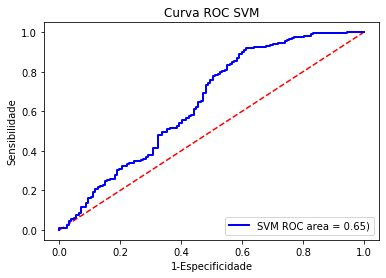

In [122]:
#GRAPH DATA
fig = plt.figure()
plt.xlabel('1-Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC SVM')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_svm.PNG')

# Curva ROC XGBoost

In [65]:
#for i in range(1,20):
pca = PCA(n_components = 16)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=0.20)
model.fit(X_train,y_train)
predictedprob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictedprob[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.913951473136915


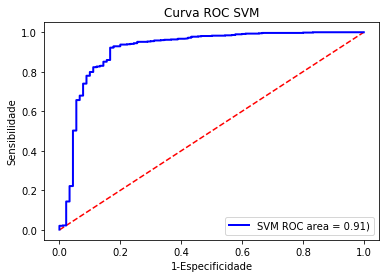

In [66]:
#GRAPH DATA
fig = plt.figure()
plt.xlabel('1-Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC SVM')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_SVM_otimizado.PNG')

# Avaliação do PCA e divisão teste/treino - SVM

In [92]:
auc_total = []
auc_divisao = []
convergencia = False

numAucsComponente = []
numAucsDivisao = []
for divisao in np.arange(0.1, 1, 0.1):
    print(divisao)
    for numComponentes in range(1,20):
        print(numComponentes)
        auc_componente = []
        media_anterior = 0
        qtd_iguais = 0
        pca = PCA(n_components = numComponentes)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        convergencia = False
        while(not convergencia):
            X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
            model.fit(X_train,y_train)
            predictedprob = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_test, predictedprob[:,1])
            roc_auc = auc(fpr, tpr)
            auc_componente.append(roc_auc)
            media_aucs = round(sum(auc_componente) / len(auc_componente), 2) 
            print(media_aucs)
            if media_anterior == media_aucs:
                qtd_iguais = qtd_iguais + 1
            else:
                qtd_iguais = 0
            if qtd_iguais >= 10:
                numAucsComponente.append(len(auc_componente))
                auc_total.append(media_aucs)
                convergencia = True
            media_anterior = media_aucs
    numAucsDivisao.append(numAucsComponente)
    numAucsComponente = []
    auc_divisao.append(auc_total)
    auc_total = []
    

0.1
1
0.56
0.52
0.54
0.52
0.53
0.53
0.51
0.52
0.52
0.51
0.51
0.51
0.51
0.5
0.5
0.5
0.51
0.51
0.51
0.51
0.51
0.51
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
2
0.56
0.48
0.45
0.47
0.46
0.48
0.48
0.48
0.48
0.48
0.48
0.48
0.48
0.48
0.48
0.48
3
0.62
0.65
0.63
0.64
0.64
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.65
0.65
0.65
0.65
0.65
0.65
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
0.66
4
0.74
0.73
0.73
0.75
0.75
0.74
0.74
0.74
0.75
0.75
0.75
0.74
0.74
0.74
0.75
0.74
0.75
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
5
0.77
0.76
0.77
0.77
0.78
0.77
0.77
0.76
0.77
0.76
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.74
0.74
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
6
0.8
0.83
0.8
0.77
0.78
0.77
0.77
0.76
0.76
0.76
0.76
0.77
0.77
0.77
0.77
0.76
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
7
0.82
0.81
0.8
0.81
0.82
0.82
0.82
0.83
0.83
0.83
0.83
0.82
0.83
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
8
0.84
0.

0.91
0.91
0.91
0.91
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
16
0.89
0.9
0.89
0.89
0.89
0.89
0.89
0.89
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
17
0.91
0.9
0.9
0.9
0.9
0.89
0.89
0.89
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
18
0.87
0.89
0.89
0.89
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
19
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.5
1
0.52
0.49
0.5
0.5
0.5
0.51
0.51
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
2
0.51
0.52
0.51
0.51
0.52
0.52
0.52
0.52
0.52
0.52
0.52
0.51
0.51
0.51
0.51
0.51
0.51
0.51
0.51
0.51
0.51
0.51
3
0.67
0.67
0.67
0.67
0.68
0.68
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
4
0.74
0.74
0.73
0.73
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
0.74
5
0.74
0.76
0.76
0.75
0.75
0.75
0.75
0.75
0.75
0.76
0.75
0.75
0.75
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
6
0.77
0.77
0.78
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
0.77
7
0.81
0.82
0.81
0.81
0.82
0.82
0.82
0.82
0.82
0.82
0.81
0.81
0.81
0.81
0.81
0.81
0.81
0.81
0.81
0.81

0.85
0.85
0.85
0.86
0.86
0.86
0.86
0.85
0.86
0.86
0.85
0.85
0.85
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
15
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
16
0.84
0.85
0.86
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
17
0.85
0.85
0.86
0.85
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
18
0.83
0.85
0.85
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
19
0.84
0.86
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85


In [93]:
auc_divisao

[[0.5,
  0.48,
  0.66,
  0.74,
  0.75,
  0.77,
  0.82,
  0.85,
  0.84,
  0.88,
  0.88,
  0.89,
  0.9,
  0.9,
  0.89,
  0.9,
  0.9,
  0.9,
  0.91],
 [0.5,
  0.5,
  0.65,
  0.74,
  0.75,
  0.76,
  0.82,
  0.83,
  0.83,
  0.87,
  0.88,
  0.89,
  0.89,
  0.9,
  0.91,
  0.91,
  0.9,
  0.91,
  0.9],
 [0.5,
  0.5,
  0.65,
  0.74,
  0.76,
  0.77,
  0.82,
  0.84,
  0.83,
  0.88,
  0.88,
  0.89,
  0.89,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 [0.49,
  0.5,
  0.66,
  0.74,
  0.76,
  0.77,
  0.81,
  0.82,
  0.83,
  0.87,
  0.88,
  0.88,
  0.89,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 [0.5,
  0.51,
  0.67,
  0.74,
  0.76,
  0.77,
  0.81,
  0.82,
  0.83,
  0.88,
  0.87,
  0.88,
  0.88,
  0.89,
  0.9,
  0.9,
  0.9,
  0.89,
  0.89],
 [0.51,
  0.5,
  0.66,
  0.74,
  0.76,
  0.77,
  0.81,
  0.82,
  0.83,
  0.87,
  0.87,
  0.88,
  0.88,
  0.89,
  0.89,
  0.89,
  0.9,
  0.89,
  0.89],
 [0.49,
  0.5,
  0.67,
  0.73,
  0.75,
  0.76,
  0.8,
  0.81,
  0.81,
  0.86,
  0.86,
  0.87,
  0.87,
  0.89,
  0.

In [94]:
def add(x):
    return x+1

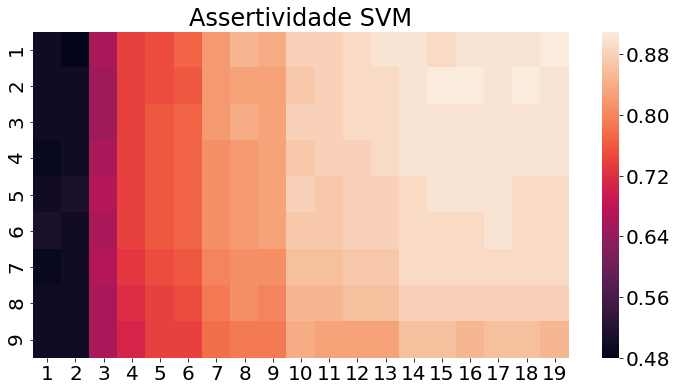

In [123]:
import seaborn as sns
fig = plt.figure(figsize = (12,6))

df_divisao = pd.DataFrame(auc_divisao)
df_divisao.set_index(np.arange(1,10), inplace = True)
df_divisao.rename(add, axis='columns', inplace=True)
sns.heatmap(data = df_divisao)
plt.title("Assertividade SVM")
plt.savefig('assertividade-svm-divisao-numcomponentes.PNG')
plt.rcParams.update({'font.size': 20})

In [96]:
df_divisao

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.50,0.48,0.66,0.74,0.75,0.77,0.82,0.85,0.84,0.88,0.88,0.89,0.90,0.90,0.89,0.90,0.90,0.90,0.91
2,0.50,0.50,0.65,0.74,0.75,0.76,0.82,0.83,0.83,0.87,0.88,0.89,0.89,0.90,0.91,0.91,0.90,0.91,0.90
3,0.50,0.50,0.65,0.74,0.76,0.77,0.82,0.84,0.83,0.88,0.88,0.89,0.89,0.90,0.90,0.90,0.90,0.90,0.90
4,0.49,0.50,0.66,0.74,0.76,0.77,0.81,0.82,0.83,0.87,0.88,0.88,0.89,0.90,0.90,0.90,0.90,0.90,0.90
5,0.50,0.51,0.67,0.74,0.76,0.77,0.81,0.82,0.83,0.88,0.87,0.88,0.88,0.89,0.90,0.90,0.90,0.89,0.89
6,0.51,0.50,0.66,0.74,0.76,0.77,0.81,0.82,0.83,0.87,0.87,0.88,0.88,0.89,0.89,0.89,0.90,0.89,0.89
7,0.49,0.50,0.67,0.73,0.75,0.76,0.80,0.81,0.81,0.86,0.86,0.87,0.87,0.89,0.89,0.89,0.89,0.89,0.89
8,0.50,0.50,0.66,0.72,0.74,0.75,0.79,0.81,0.80,0.85,0.85,0.86,0.86,0.88,0.88,0.88,0.88,0.88,0.88
9,0.50,0.50,0.66,0.71,0.74,0.74,0.78,0.79,0.79,0.84,0.83,0.83,0.83,0.86,0.86,0.85,0.86,0.86,0.85


In [99]:
numAucsDivisao
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,33,16,40,28,30,27,24,33,31,19,26,33,24,15,24,36,18,36,22
2,23,31,37,15,36,29,32,36,17,18,25,15,19,22,21,12,15,24,17
3,24,21,19,44,22,22,16,14,16,22,23,12,11,14,15,38,12,24,23
4,39,17,22,33,12,29,15,21,14,14,17,34,15,25,21,19,19,15,11
5,18,22,17,15,24,14,21,19,31,12,18,21,17,15,19,23,27,11,24
6,19,12,31,27,12,12,11,13,18,27,19,14,11,19,13,11,15,21,16
7,17,16,16,26,13,12,16,12,11,12,17,13,11,12,13,11,13,11,11
8,30,23,23,20,14,14,22,23,22,27,16,15,14,21,15,11,13,19,13
9,21,36,19,14,12,14,23,15,18,13,19,18,14,39,11,14,15,14,13


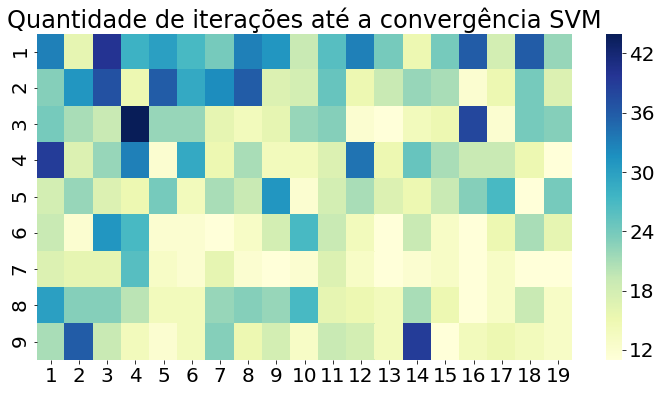

In [124]:
import seaborn as sns
fig = plt.figure(figsize = (12,6))

df = pd.DataFrame(numAucsDivisao)
df.set_index(np.arange(1,10), inplace = True)
df.rename(add, axis='columns', inplace=True)
sns.heatmap(data = df, cmap = 'YlGnBu')
plt.title("Quantidade de iterações até a convergência SVM")
plt.savefig('iteracoes-svm-divisao-numcomponentes.PNG')

# Avaliação do PCA e divisão teste/treino - XGBoost

In [125]:
auc_total = []
auc_divisao = []
convergencia = False

numAucsComponente = []
numAucsDivisao = []
for divisao in np.arange(0.1, 1, 0.1):
    print(divisao)
    for numComponentes in range(1,20):
        print(numComponentes)
        auc_componente = []
        media_anterior = 0
        qtd_iguais = 0
        pca = PCA(n_components = numComponentes)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        convergencia = False
        while(not convergencia):
            X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
            xg_reg.fit(X_train,y_train)
            predictedprob = xg_reg.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_test, predictedprob[:,1])
            roc_auc = auc(fpr, tpr)
            auc_componente.append(roc_auc)
            media_aucs = round(sum(auc_componente) / len(auc_componente), 2) 
            print(len(auc_componente))
            if media_anterior == media_aucs:
                qtd_iguais = qtd_iguais + 1
            else:
                qtd_iguais = 0
            if qtd_iguais >= 20:
                numAucsComponente.append(len(auc_componente))
                auc_total.append(media_aucs)
                print(len(auc_componente))
                convergencia = True
            media_anterior = media_aucs
    numAucsDivisao.append(numAucsComponente)
    numAucsComponente = []
    auc_divisao.append(auc_total)
    auc_total = []
    

0.1
1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
85
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
51
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
34
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
49
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
47
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
38
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
126
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
37
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
30
18
1
2
3
4
5
6
7
8
9
10
11
12


26
27
28
29
30
31
31
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
28
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
27
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
42
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
29
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
33
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
73
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
22
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
26
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
42
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

In [126]:
auc_divisao

[[0.56,
  0.58,
  0.64,
  0.63,
  0.64,
  0.65,
  0.73,
  0.76,
  0.7,
  0.81,
  0.8,
  0.8,
  0.79,
  0.82,
  0.81,
  0.81,
  0.84,
  0.82,
  0.8],
 [0.55,
  0.56,
  0.62,
  0.63,
  0.64,
  0.64,
  0.72,
  0.75,
  0.7,
  0.8,
  0.79,
  0.8,
  0.79,
  0.81,
  0.81,
  0.81,
  0.83,
  0.82,
  0.81],
 [0.55,
  0.55,
  0.63,
  0.63,
  0.63,
  0.65,
  0.73,
  0.75,
  0.69,
  0.79,
  0.79,
  0.8,
  0.79,
  0.81,
  0.81,
  0.81,
  0.83,
  0.82,
  0.8],
 [0.56,
  0.54,
  0.62,
  0.63,
  0.63,
  0.64,
  0.72,
  0.75,
  0.69,
  0.79,
  0.79,
  0.79,
  0.79,
  0.81,
  0.8,
  0.8,
  0.82,
  0.81,
  0.8],
 [0.56,
  0.55,
  0.63,
  0.62,
  0.63,
  0.64,
  0.72,
  0.75,
  0.68,
  0.79,
  0.78,
  0.78,
  0.78,
  0.8,
  0.8,
  0.8,
  0.82,
  0.8,
  0.79],
 [0.55,
  0.55,
  0.62,
  0.63,
  0.63,
  0.64,
  0.72,
  0.73,
  0.68,
  0.78,
  0.77,
  0.77,
  0.77,
  0.8,
  0.79,
  0.79,
  0.81,
  0.8,
  0.78],
 [0.54,
  0.54,
  0.62,
  0.62,
  0.62,
  0.63,
  0.71,
  0.74,
  0.67,
  0.77,
  0.76,
  0.77,
  0.

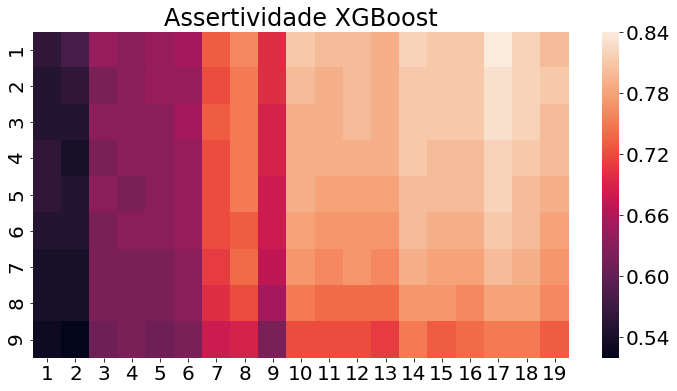

In [127]:
import seaborn as sns
fig = plt.figure(figsize = (12,6))

df_divisao = pd.DataFrame(auc_divisao)
df_divisao.set_index(np.arange(1,10), inplace = True)
df_divisao.rename(add, axis='columns', inplace=True)
sns.heatmap(data = df_divisao)
plt.title("Assertividade XGBoost")
plt.savefig('assertividade-xgboost-divisao-numcomponentes.PNG')

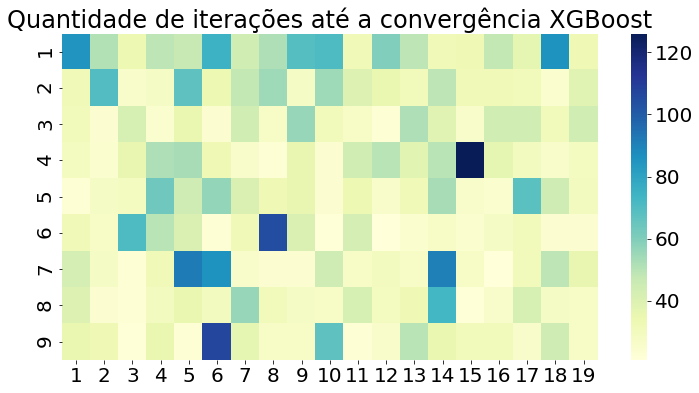

In [128]:
import seaborn as sns
fig = plt.figure(figsize = (12,6))

df = pd.DataFrame(numAucsDivisao)
df.set_index(np.arange(1,10), inplace = True)
df.rename(add, axis='columns', inplace=True)
sns.heatmap(data = df, cmap = 'YlGnBu')
plt.title("Quantidade de iterações até a convergência XGBoost")
plt.savefig('iteracoes-xgboost-divisao-numcomponentes.PNG')

In [129]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,85,51,34,49,47,75,44,52,69,71,32,60,49,32,33,48,37,86,33
2,32,70,26,28,67,34,48,55,28,55,40,35,31,49,32,32,31,25,39
3,31,24,42,25,35,24,44,27,56,31,27,23,52,39,26,44,44,31,44
4,29,25,36,52,53,33,26,23,36,24,44,50,38,50,126,37,30,26,29
5,23,28,29,64,45,57,41,33,36,24,34,26,32,53,26,25,68,45,30
6,32,27,71,50,41,23,32,105,41,22,43,21,25,27,25,28,31,24,24
7,43,28,23,32,92,86,26,24,24,45,27,30,27,91,27,21,31,49,36
8,40,24,23,30,35,30,56,31,28,27,42,29,33,73,22,26,42,28,27
9,35,33,22,35,23,107,37,27,27,67,23,26,50,35,31,31,26,45,27
